<h1>Clustering</h1>

<b>K-Means<b>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Prostate_Cancer2.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


Text(0, 0.5, 'area')

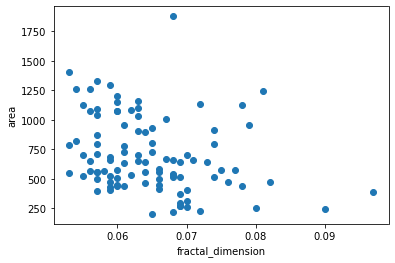

In [6]:
plt.scatter(df.fractal_dimension,df['area'])
plt.xlabel('fractal_dimension')
plt.ylabel('area')

Text(0, 0.5, 'compactness')

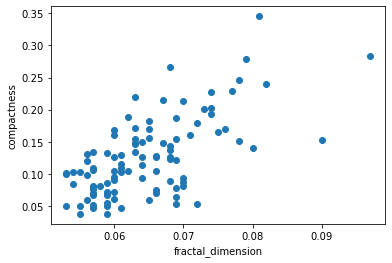

In [7]:
plt.scatter(df.fractal_dimension,df['compactness'])
plt.xlabel('fractal_dimension')
plt.ylabel('compactness')

In [8]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['fractal_dimension','compactness']])
y_predicted

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [9]:
df['cluster']=y_predicted
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,cluster
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059,0


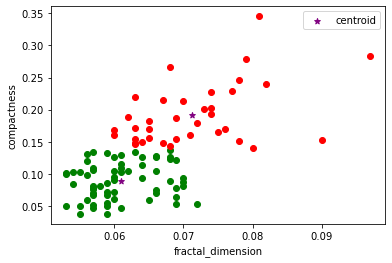

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.fractal_dimension,df1['compactness'],color='green')
plt.scatter(df2.fractal_dimension,df2['compactness'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('fractal_dimension')
plt.ylabel('compactness')
plt.legend()

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['fractal_dimension','compactness']])
    sse.append(km.inertia_)

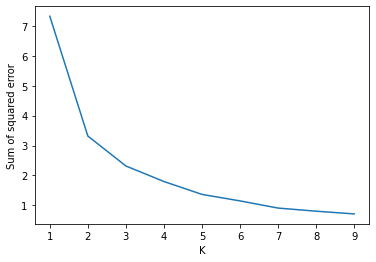

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

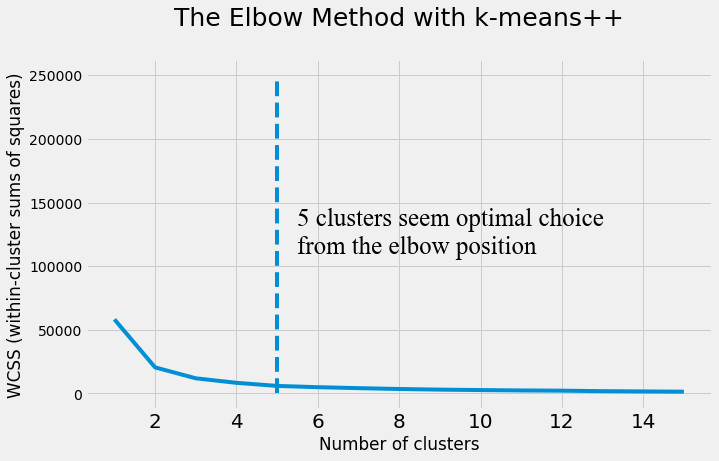

In [33]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
    plt.text(x=5.5,y=110000,s='5 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

<b>Hierarchical Clustering<b>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [20]:
df = pd.read_csv("Prostate_Cancer2.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [21]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


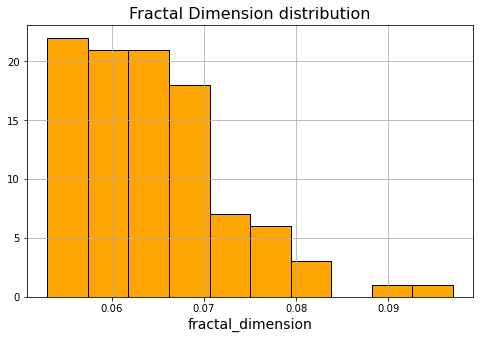

In [22]:
plt.figure(figsize=(8,5))
plt.title("Fractal Dimension distribution",fontsize=16)
plt.xlabel ("fractal_dimension",fontsize=14)
plt.grid(True)
plt.hist(df['fractal_dimension'],color='orange',edgecolor='k')
plt.show()

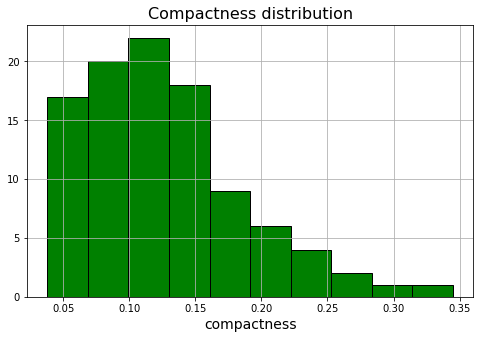

In [23]:
plt.figure(figsize=(8,5))
plt.title("Compactness distribution",fontsize=16)
plt.xlabel ("compactness",fontsize=14)
plt.grid(True)
plt.hist(df['compactness'],color='green',edgecolor='k')
plt.show()

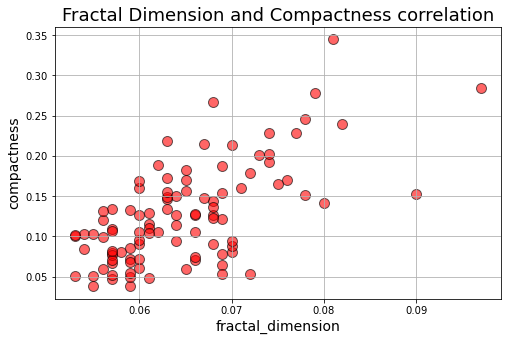

In [25]:
plt.figure(figsize=(8,5))
plt.title("Fractal Dimension and Compactness correlation",fontsize=18)
plt.xlabel ("fractal_dimension",fontsize=14)
plt.ylabel ("compactness",fontsize=14)
plt.grid(True)
plt.scatter(df['fractal_dimension'],df['compactness'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [26]:
X = df.iloc[:,[3,4]].values

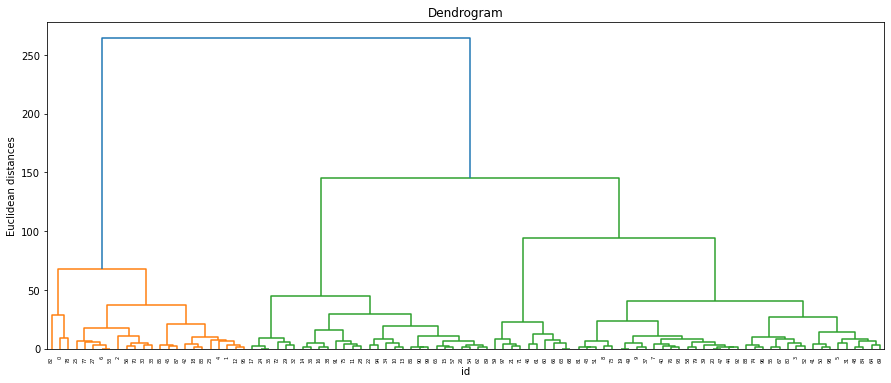

In [27]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('id')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

Optimal number of clusters

Often, the optimal number of clusters can be found from a Dendogram is a simple manner.
Look for the longest stretch of vertical line which is not crossed by any ***extended*** horizontal lines (here *extended* means horizontal lines i.e. the cluster dividers are extended infinitely to both directions).
Now take any point on that stretch of line and draw an imaginary horizontal line.
Count how many vertical lines this imaginary lines crossed.
That is likely to be the optimal number of clusters.

**The idea is shown in the following figure. Here the optimal number of clusters could be 5.**

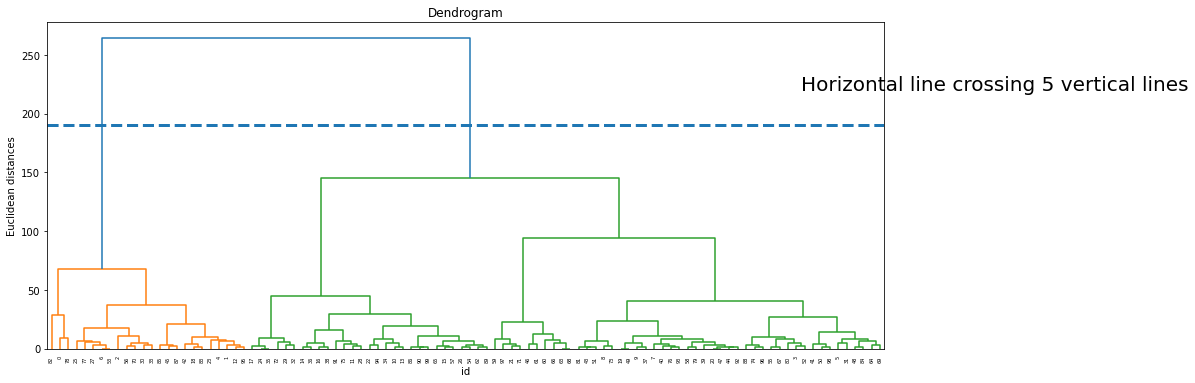

In [28]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('id')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

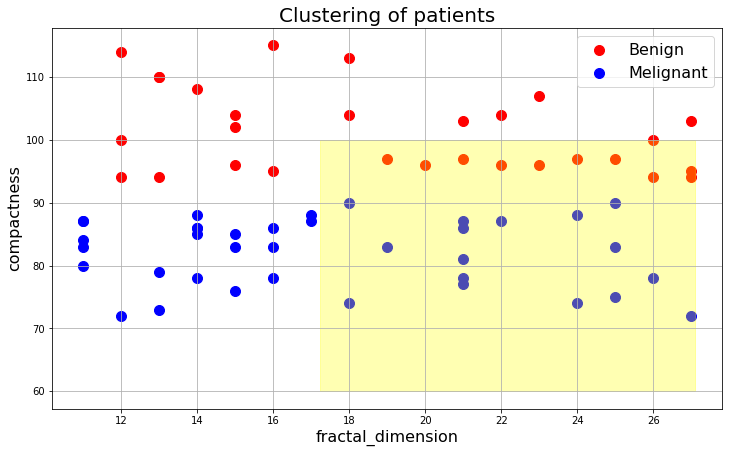

In [32]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Benign')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Melignant')

plt.title('Clustering of patients',fontsize=20)
plt.xlabel('fractal_dimension',fontsize=16)
plt.ylabel('compactness',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

<b>Principle Component Analysis<b>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Prostate_Cancer2.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [39]:
df.diagnosis_result = [1 if each == 'M' else 0 for each in df.diagnosis_result]
df.diagnosis_result.value_counts()
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [40]:
df.iloc[:,1:].describe()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.620000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,0.487832,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,0.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,0.000000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,1.000000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,1.000000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,1.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


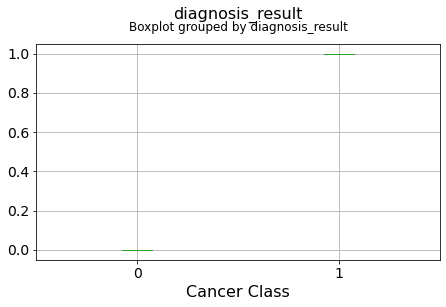

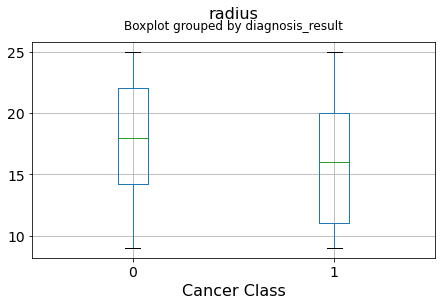

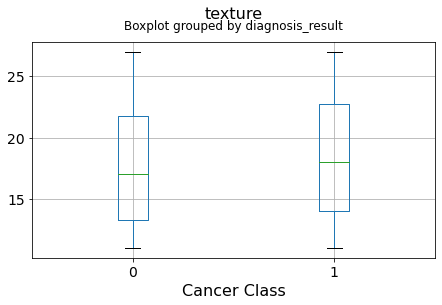

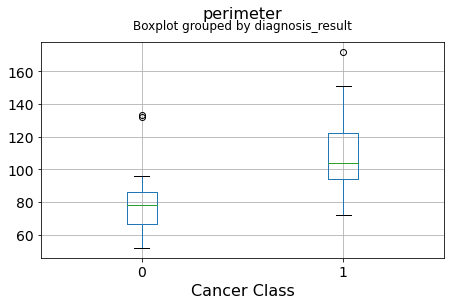

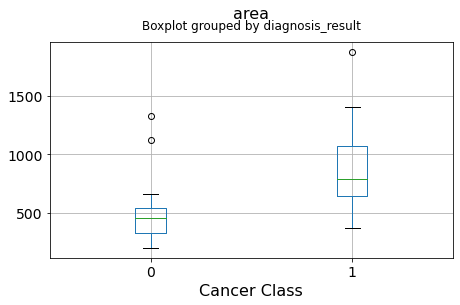

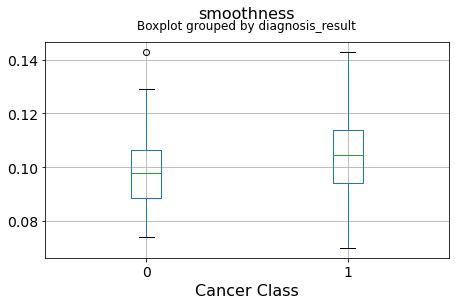

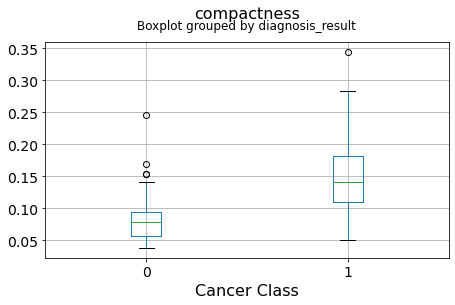

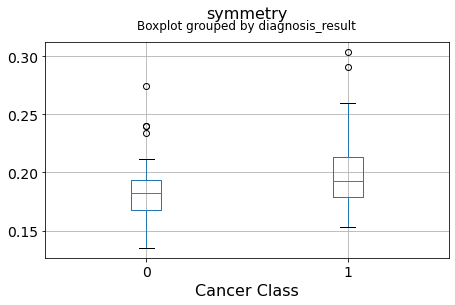

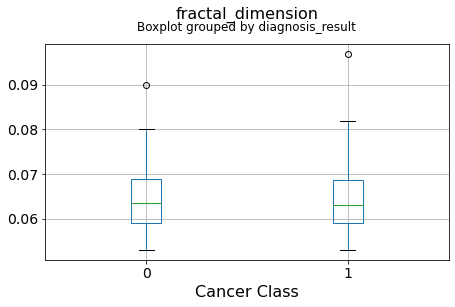

In [41]:
for c in df.columns[1:]:
    df.boxplot(c,by='diagnosis_result',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Cancer Class", fontsize=16)

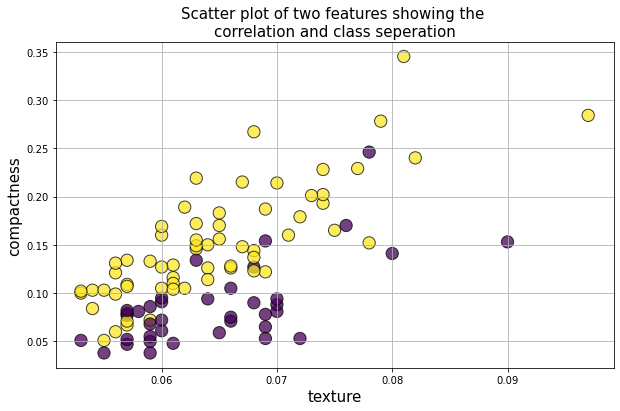

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(df['fractal_dimension'],df['compactness'],c=df['diagnosis_result'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("texture",fontsize=15)
plt.ylabel("compactness",fontsize=15)
plt.show()

<ipython-input-44-2465053b018e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
<ipython-input-44-2465053b018e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


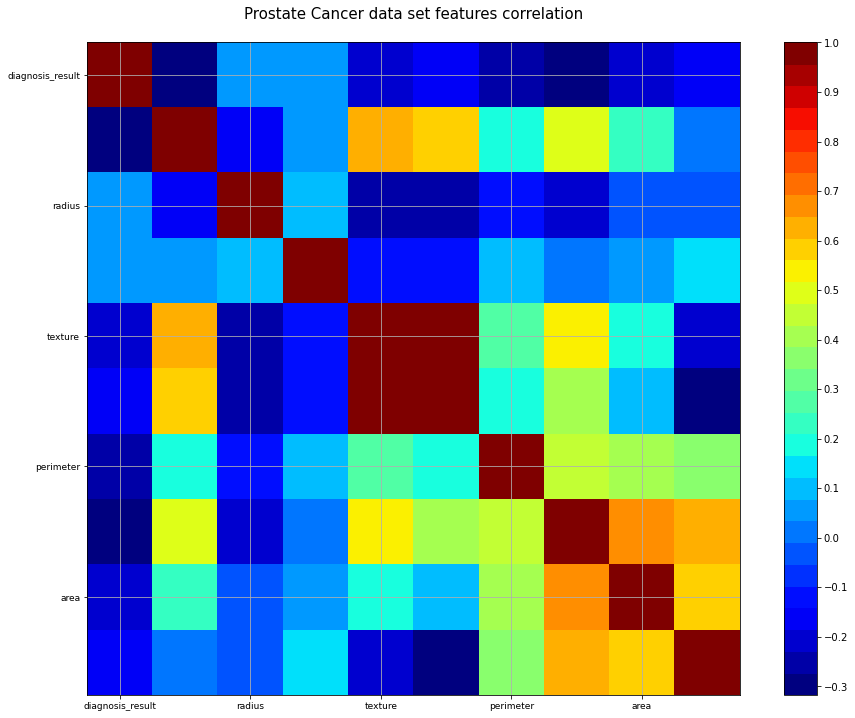

In [44]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Prostate Cancer data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [56]:
X = df.drop('diagnosis_result',axis=1)
y = df['diagnosis_result']

In [57]:
X = scaler.fit_transform(X)

In [58]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [59]:
dfx.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,-1.714816,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.680173,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,-1.645531,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-1.610888,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.576245,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593
5,-1.541602,1.678807,1.310257,-0.584954,-0.710073,1.734581,0.711737,0.516801,1.394556
6,-1.506960,-0.175090,1.503796,0.985677,1.059765,-0.530602,-0.290941,-0.462607,-0.948199
7,-1.472317,-0.381079,-0.044514,-0.287808,-0.392571,1.116804,0.629550,0.875918,1.271253
8,-1.437674,0.442876,1.116719,-0.372706,-0.574899,1.665939,1.089796,1.365622,1.147950
9,-1.403031,1.678807,-1.399285,-0.542504,-0.713216,1.116804,1.862351,0.320920,2.134373


In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=None)

In [62]:
dfx_pca = pca.fit(dfx)

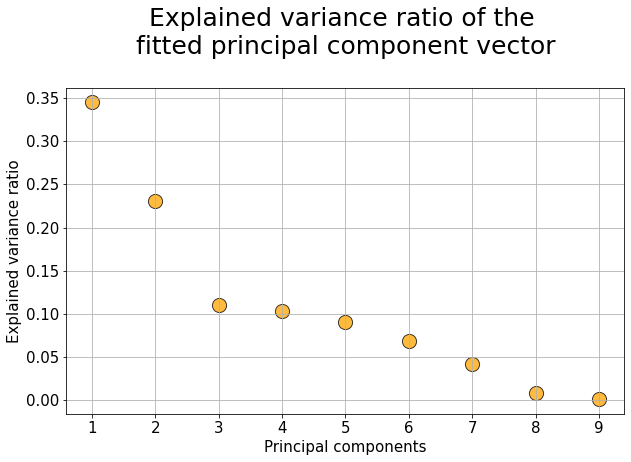

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [64]:
dfx_trans = pca.transform(dfx)

In [65]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8
0,4.793398,0.683334,-0.349518,-2.046493,0.846199,-1.284862,-0.755371,-0.159394,0.826786
1,2.188877,-2.540412,-0.775797,-0.435807,-2.121473,-2.188079,0.299607,0.744534,-0.081861
2,2.244297,-0.766380,2.192252,-1.425831,-1.139194,-0.369292,0.187103,0.005910,-0.148683
3,2.279461,3.538515,-2.154188,-0.068883,0.796727,3.677896,-0.677508,0.367691,0.006656
4,2.639687,-2.037181,0.145747,-0.020683,-2.247933,-1.594030,-0.068368,0.234935,-0.098619
5,1.205443,2.544928,1.135022,-1.695025,-0.805052,-0.654685,-0.557817,-0.055646,-0.056363
6,0.388282,-1.437692,1.358426,-0.698488,-1.535332,1.095947,0.113568,0.115251,0.038314
7,1.606753,1.497707,-0.739365,-0.519247,-0.943650,-0.151018,0.016200,0.154911,0.012858
8,1.962606,2.274208,0.574799,-0.811074,-0.919186,-0.341339,0.255087,-0.288507,-0.058706
9,1.660329,2.295229,-1.263375,-2.026931,0.778954,-0.464343,-1.475522,-0.402115,-0.177300


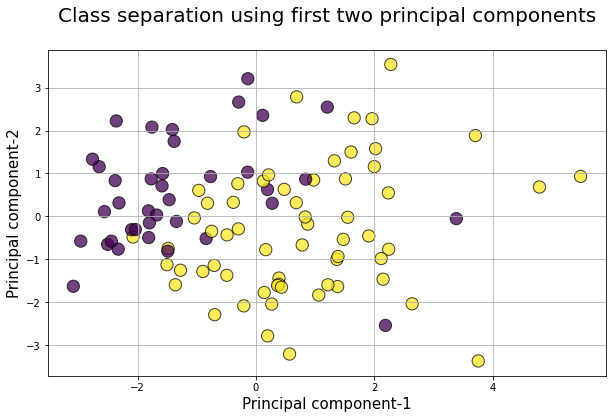

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['diagnosis_result'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()